<a href="https://colab.research.google.com/github/Adrok24/NN_exercises/blob/master/plants_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Nov 25 22:59:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from zipfile import ZipFile 
import os

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
folder = 'drive/My Drive/Plant_leaf_diseases_dataset_without_augmentation.zip'

In [ ]:
plants_files_folder = "Plant_leave_diseases_dataset_without_augmentation"
with zipfile.ZipFile(folder,"r") as zip_ref:
    zip_ref.extractall("Plants")

In [ ]:
base_dir = './Plants'

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [ ]:
plants_categories = os.listdir('/'.join((base_dir,plants_files_folder)))

# Creamos los directorios para las 39 clases presentes en el dataset
for directory in (train_dir, validation_dir, test_dir):
    for folder_name in plants_categories:
        name_split = folder_name.split('___') 
        plant_name = name_split[0]
        path_dir = ""
        if (len(name_split) > 1):
            plant_health = name_split[1]
            path_dir = os.path.join(directory, plant_health, plant_name)
        else:
            path_dir = os.path.join(directory, plant_name)
        os.makedirs(path_dir, exist_ok=True)

In [ ]:
import shutil

for plant_category in plants_categories:
    plants_pictures = os.listdir('/'.join((base_dir,plants_files_folder, plant_category)))


    name_split = plant_category.split('___') 
    plant_name = name_split[0]
    path_dir = ""
    if (len(name_split) > 1):
        plant_health = name_split[1]
        path_dir = os.path.join( plant_health, plant_name)
    else:
        path_dir = os.path.join(plant_name)
    #print(path_dir)
    
    #Dividimos train 80%, validation 10% y test 10%. 
    train_ds = plants_pictures[:int(len(plants_pictures)*0.8)]
    val_ds = plants_pictures[int(len(plants_pictures)*0.8):int(len(plants_pictures)*0.9)]
    test_ds = plants_pictures[int(len(plants_pictures)*0.9):len(plants_pictures)]

    #Copio los porcentajes de cada clase en su correspondiente carpeta
    fnames = [i for i in train_ds]
    for fname in fnames:
        # try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'train',path_dir, fname)
            shutil.copyfile(src, dst)
        # except OSError:
            pass

    
    fnames = [i for i in val_ds]
    for fname in fnames:
        # try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'validation',path_dir, fname)
            shutil.copyfile(src, dst)      
        # except:
            pass


    fnames = [i for i in test_ds]
    for fname in fnames:
        # try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'test',path_dir, fname)
            shutil.copyfile(src, dst)
                
        # except OSError:
            pass
        

In [ ]:
#creamos DataFrames de train test y val
import pandas as pd
dict_train = {}
count_files = 0

for root, dirs, files in os.walk(train_dir, topdown=False):
    for name_file in files:
        dict_train[count_files] = {"file": os.path.join(root, name_file), "path": root, "health": root.split('/')[3], "type": root.split('/')[4] if len(root.split('/')) > 4 else root.split('/')[3]}
        count_files = count_files + 1

df_train = pd.DataFrame.from_dict(dict_train, "index")
display(df_train.shape)

dict_test = {}
count_files = 0

for root, dirs, files in os.walk(test_dir, topdown=False):
    for name_file in files:
        dict_test[count_files] = {"file": os.path.join(root, name_file), "path": root, "health": root.split('/')[3], "type": root.split('/')[4] if len(root.split('/')) > 4 else root.split('/')[3]}
        count_files = count_files + 1

df_test = pd.DataFrame.from_dict(dict_test, "index")
display(df_test.shape)

dict_validation = {}
count_files = 0

for root, dirs, files in os.walk(validation_dir, topdown=False):
    for name_file in files:
        dict_validation[count_files] = {"file": os.path.join(root, name_file), "path": root, "health": root.split('/')[3], "type": root.split('/')[4] if len(root.split('/')) > 4 else root.split('/')[3]}
        count_files = count_files + 1

df_validation = pd.DataFrame.from_dict(dict_validation, "index")
display(df_validation.shape)

(44343, 4)

(5563, 4)

(5542, 4)

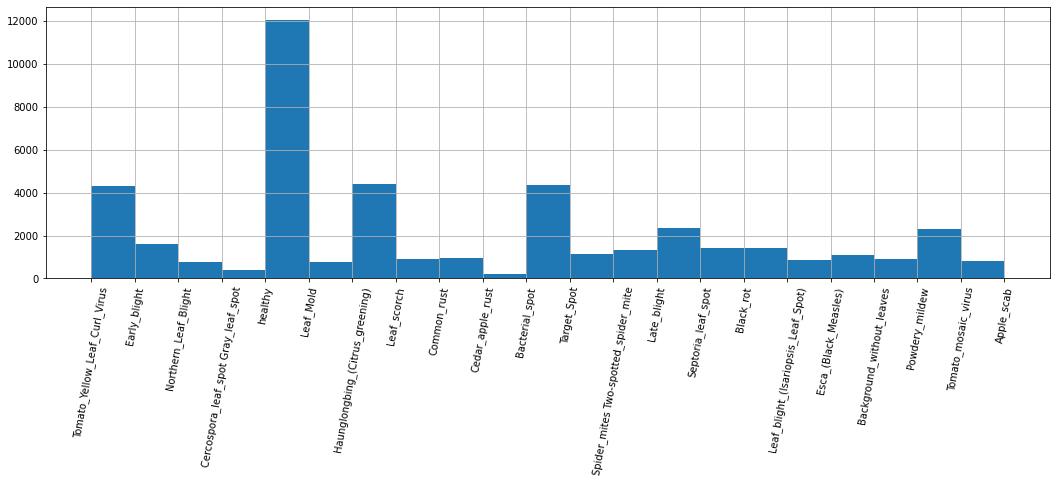

In [ ]:
df_train.health.hist(figsize=(18,5), xrot=80, bins=df_train.health.value_counts().shape[0] -1)

In [ ]:
df_train.health.value_counts()

healthy                                 12062
Haunglongbing_(Citrus_greening)          4405
Bacterial_spot                           4335
Tomato_Yellow_Leaf_Curl_Virus            4285
Late_blight                              2327
Powdery_mildew                           2309
Early_blight                             1600
Black_rot                                1440
Septoria_leaf_spot                       1416
Spider_mites Two-spotted_spider_mite     1340
Target_Spot                              1123
Esca_(Black_Measles)                     1106
Common_rust                               953
Background_without_leaves                 914
Leaf_scorch                               887
Leaf_blight_(Isariopsis_Leaf_Spot)        860
Northern_Leaf_Blight                      788
Leaf_Mold                                 761
Apple_scab                                504
Cercospora_leaf_spot Gray_leaf_spot       410
Tomato_mosaic_virus                       298
Cedar_apple_rust                  

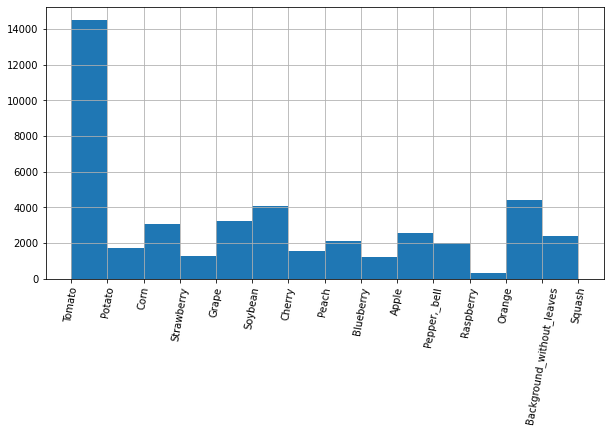

In [ ]:
df_train.type.hist(figsize=(10,5), xrot=80, bins=df_train.type.value_counts().shape[0] - 1)

In [ ]:
df_train.type.value_counts()

Tomato                       14523
Orange                        4405
Soybean                       4072
Grape                         3248
Corn                          3080
Apple                         2536
Peach                         2125
Pepper,_bell                  1979
Potato                        1721
Cherry                        1524
Squash                        1468
Strawberry                    1251
Blueberry                     1201
Background_without_leaves      914
Raspberry                      296
Name: type, dtype: int64

./Plants/train/healthy/Blueberry/image (314).JPG


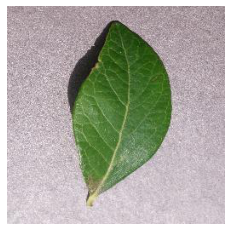

./Plants/train/Apple_scab/Apple/image (467).JPG


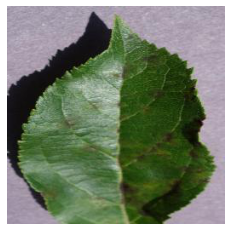

./Plants/train/Septoria_leaf_spot/Tomato/image (364).JPG


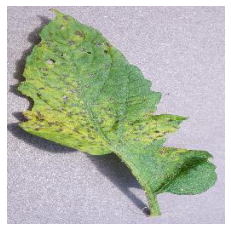

./Plants/train/Powdery_mildew/Cherry/image (581).JPG


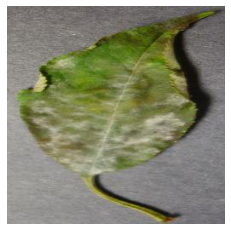

./Plants/train/Haunglongbing_(Citrus_greening)/Orange/image (1186).JPG


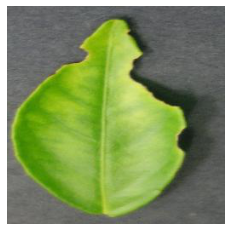

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

for index in np.random.choice(df_train.shape[0], 5):
  plant = df_train.iloc[index].file
  print(plant)
  plt.imshow(image.load_img(plant))
  plt.axis('off')
  plt.show()  

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=25,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.25,
      horizontal_flip=True,
      fill_mode='nearest')

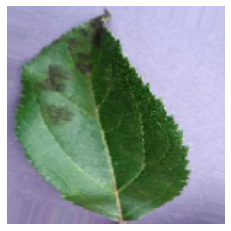

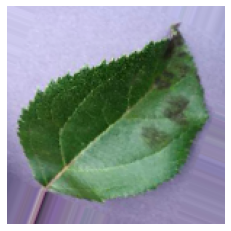

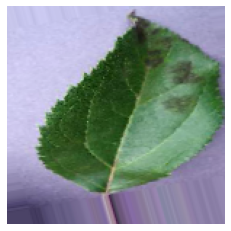

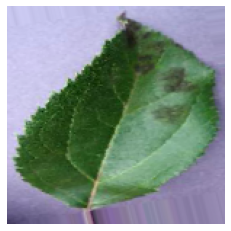

In [ ]:
# Elegimos una imagen para "aumentar"
img_path = df_train.iloc[-2].file

# La leemos y la reescalamos
img = image.load_img(img_path, target_size=(150, 150))

# La convertimos a un Numpy de forma (150, 150, 3)
x = image.img_to_array(img)

# La reescalamos a (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# El comando .flow() genera batches de imágenes transformadas aleatoriamente
# Usamos un `break` para cortar el loop en algún momento
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    i += 1
    if i % 4 == 0:
        break

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_dir = ""
# Reescalamos todas las imágenes en un factor de 1./255
train_datagen = ImageDataGenerator(
      rotation_range=25,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.25,
      horizontal_flip=True,
      fill_mode='nearest',
      rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    df_train, # Referimos el df de train
    directory=data_dir, # El directorio donde se encuentran las imágenes
    x_col='file', # La columna con los path de los archivos
    y_col=['health', 'type'], # La variable con las labels
    target_size=(150, 150),
    classes=None, # Las clases se obtienen a partir de y_col
    class_mode='multi_output', # Se trata de un problema multi-output, multi-label
    batch_size=32
   )

val_generator = test_datagen.flow_from_dataframe(
    df_validation, # Referimos el df de validación
    directory=data_dir, # El directorio donde se encuentran las imágenes
    x_col='file', # La columna con los path de los archivos
    y_col=['health', 'type'], # La variable con las labels
    target_size=(150, 150),
    classes=None, # Las clases se obtienen a partir de y_col
    class_mode='multi_output', # Se trata de un problema multi-output, multi-label
    batch_size=32,
    shuffle=False
   )

Found 44343 validated image filenames.
Found 5542 validated image filenames.


In [ ]:
df_train

,file,path,health,type
0,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,Tomato_Yellow_Leaf_Curl_Virus,Tomato
1,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,Tomato_Yellow_Leaf_Curl_Virus,Tomato
2,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,Tomato_Yellow_Leaf_Curl_Virus,Tomato
3,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,Tomato_Yellow_Leaf_Curl_Virus,Tomato
4,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/T...,Tomato_Yellow_Leaf_Curl_Virus,Tomato
...,...,...,...,...
44338,./Plants/train/Apple_scab/Apple/image (87).JPG,./Plants/train/Apple_scab/Apple,Apple_scab,Apple
44339,./Plants/train/Apple_scab/Apple/image (575).JPG,./Plants/train/Apple_scab/Apple,Apple_scab,Apple
44340,./Plants/train/Apple_scab/Apple/image (193).JPG,./Plants/train/Apple_scab/Apple,Apple_scab,Apple
44341,./Plants/train/Apple_scab/Apple/image (364).JPG,./Plants/train/Apple_scab/Apple,Apple_scab,Apple


In [ ]:
#Testeamos nuestro generador
x, y = train_generator.next()
print('x shape: ',x.shape)
print('y1 shape: ',y[0].shape)
print('y2 shape: ',y[1].shape)
print('y1: ',y[0])
print('y2: ',y[1])

x shape:  (32, 150, 150, 3)
y1 shape:  (32,)
y2 shape:  (32,)
y1:  ['Powdery_mildew' 'Septoria_leaf_spot' 'Northern_Leaf_Blight' 'healthy'
 'healthy' 'healthy' 'Bacterial_spot' 'Late_blight' 'healthy'
 'Leaf_blight_(Isariopsis_Leaf_Spot)' 'Tomato_Yellow_Leaf_Curl_Virus'
 'healthy' 'Bacterial_spot' 'Apple_scab' 'healthy'
 'Tomato_Yellow_Leaf_Curl_Virus' 'Early_blight'
 'Haunglongbing_(Citrus_greening)' 'Early_blight' 'Early_blight'
 'Leaf_scorch' 'Tomato_Yellow_Leaf_Curl_Virus' 'Early_blight'
 'Tomato_Yellow_Leaf_Curl_Virus' 'Early_blight' 'Target_Spot' 'healthy'
 'Tomato_Yellow_Leaf_Curl_Virus' 'Septoria_leaf_spot' 'Bacterial_spot'
 'Haunglongbing_(Citrus_greening)' 'Bacterial_spot']
y2:  ['Squash' 'Tomato' 'Corn' 'Soybean' 'Peach' 'Soybean' 'Peach' 'Tomato'
 'Corn' 'Grape' 'Tomato' 'Strawberry' 'Tomato' 'Apple' 'Soybean' 'Tomato'
 'Potato' 'Orange' 'Potato' 'Potato' 'Strawberry' 'Tomato' 'Potato'
 'Tomato' 'Potato' 'Tomato' 'Raspberry' 'Tomato' 'Tomato' 'Tomato'
 'Orange' 'Peach']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Creamos un encoder para devolver valores de outputs en nuestro generador personalizado
heal_encoder = OneHotEncoder()
heal_encoder.fit(df_train['health'].to_numpy().reshape(-1, 1))
type_encoder = OneHotEncoder()
type_encoder.fit(df_train['type'].to_numpy().reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
def custom_generator(generator):
  while True:
    x, y = generator.next()
    y1_encoded = heal_encoder.transform(y[0].reshape(-1, 1)).toarray()
    y2_encoded = type_encoder.transform(y[1].reshape(-1, 1)).toarray()

    yield (x, [y1_encoded, y2_encoded])

In [ ]:
# Importamos las clases Model e Input del módulo de modelos y capas, respectivamente
%load_ext tensorboard
import tensorflow as tf
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Add, Dense
from tensorflow.keras.initializers import he_normal
import datetime

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# Importamos las clases Model e Input del módulo de modelos y capas, respectivamente
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D


health_utput_units =  df_train.health.value_counts().shape[0]
type_utput_units =  df_train.type.value_counts().shape[0]

# Definimos una variable que será una instancia de la clase Input
# donde especificamos las dimensiones de los datos de entrada
input_layer = Input(shape=(150, 150, 3))
# Definimos una variable distinta para cada capa del modelo
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)

########## HEALTH LAYERS
x_health = Conv2D(64, (3, 3), activation='relu')(x)
x_health = MaxPooling2D((2, 2))(x_health)

x_health = Conv2D(128, (3, 3), activation='relu')(x_health)
x_health = MaxPooling2D((2, 2))(x_health)

x_health = Conv2D(128, (3, 3), activation='relu')(x_health)
x_health = MaxPooling2D((2, 2))(x_health)

x_health = GlobalAveragePooling2D(name='avg_pool_health')(x_health)
x_health = Dense(512, activation='relu')(x_health)
health_output_layer = Dense(health_utput_units, activation='softmax', name='health_output')(x_health)
##########
########## TYPE LAYERS
x_type = Conv2D(64, (3, 3), activation='relu')(x)
x_type = MaxPooling2D((2, 2))(x_type)

x_type = Conv2D(128, (3, 3), activation='relu')(x_type)
x_type = MaxPooling2D((2, 2))(x_type)

x_type = Conv2D(128, (3, 3), activation='relu')(x_type)
x_type = MaxPooling2D((2, 2))(x_type)

x_type = GlobalAveragePooling2D(name='avg_pool_type')(x_type)
x_type = Dense(512, activation='relu')(x_type)
x_type_output_layer = Dense(type_utput_units, activation='softmax', name='type_output')(x_type)
##########

# Creamos la instancia del modelo multi-input
# Al haber múltiples entradas, definimos una lista de inputs
model = Model(input_layer, [health_output_layer,x_type_output_layer])

In [ ]:
# Vemos que el summary del modelo es exactamente el mismo
# salvo que ahora se especifica la InputLayer, antes omitida
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 148, 148, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 74, 74, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 72, 72, 64)   18496       max_pooling2d[0][0]              
_______________________________________________________________________________________

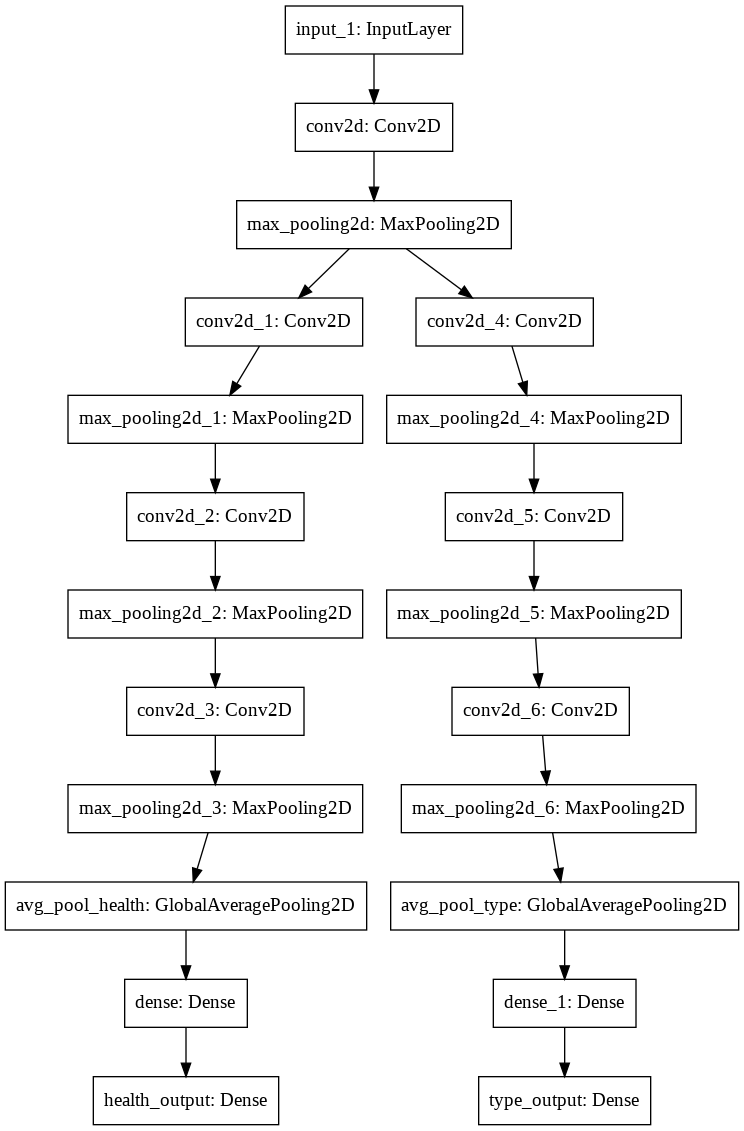

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
from keras import optimizers

model.compile(loss={'health_output' : 'categorical_crossentropy', 'type_output': 'categorical_crossentropy'}, 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics={'health_output' : 'accuracy', 'type_output': 'accuracy'})

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Instanciamos nuestro objeto early_stopping
early_stopping = EarlyStopping(monitor='loss', min_delta=0.001, patience=10, restore_best_weights=True, verbose=1)

checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Desafio II/labels_w/weights_m1_fix.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto')

# Definimos una lista de callbacks
callbacks_list = [checkpoint, early_stopping]

In [ ]:
spe = int(df_train.shape[0]/ 32) + 1
history = model.fit_generator(custom_generator(train_generator),
                              steps_per_epoch=spe,
                              epochs=40,
                              validation_data=custom_generator(val_generator),
                              validation_steps=100,
                              callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
1386/1386 [==============================] - 308s 222ms/step - loss: 4.0394 - health_output_loss: 2.1119 - type_output_loss: 1.9275 - health_output_accuracy: 0.3848 - type_output_accuracy: 0.4118 - val_loss: 3.1940 - val_health_output_loss: 1.3919 - val_type_output_loss: 1.8020 - val_health_output_accuracy: 0.6075 - val_type_output_accuracy: 0.4397
Epoch 2/40
1386/1386 [==============================] - 308s 222ms/step - loss: 3.0528 - health_output_loss: 1.6303 - type_output_loss: 1.4225 - health_output_accuracy: 0.5012 - type_output_accuracy: 0.5436 - val_loss: 3.4577 - val_health_output_loss: 2.1646 - val_type_output_loss: 1.2930 - val_health_output_accuracy: 0.3251 - val_type_output_accuracy: 0.5939
Epoch 3/40
1386/1386 [==============================] - 307s 221ms/step - loss: 2.5493 - health_output_loss: 1.3811 - type_output_loss: 1.1682 - health_output_accuracy: 0.5772 - type_output_accuracy: 

In [ ]:
model.save('drive/My Drive/Colab Notebooks/Desafio II/weights_m1_fix.h5')

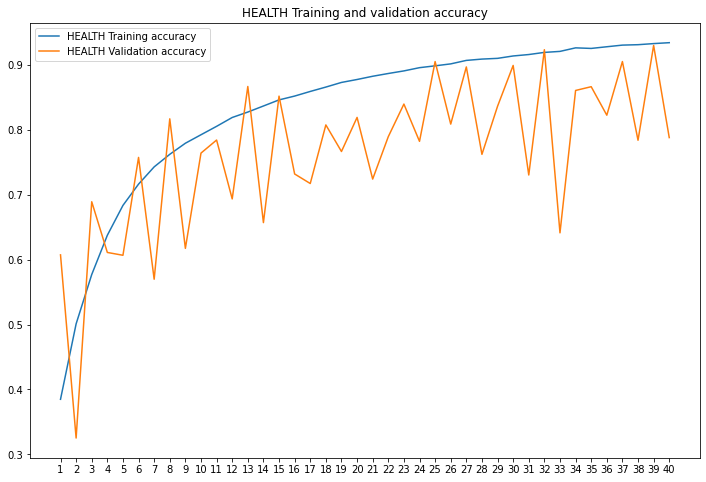

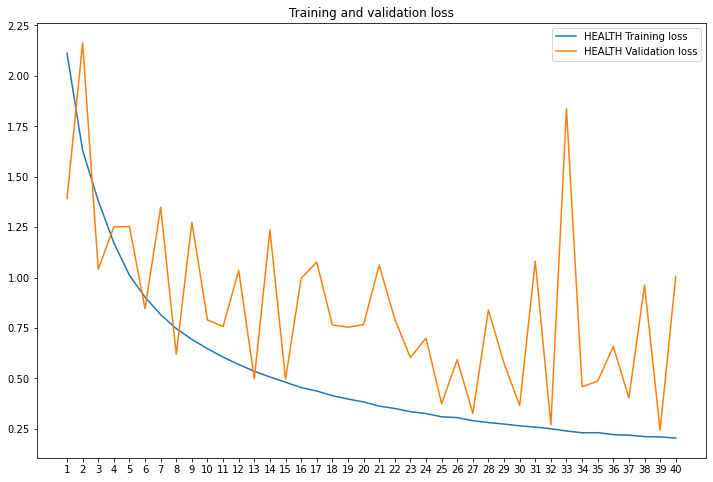

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
acc = history.history['health_output_accuracy']
val_acc = history.history['val_health_output_accuracy']
loss = history.history['health_output_loss']
val_loss = history.history['val_health_output_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, label='HEALTH Training accuracy')
plt.plot(epochs, val_acc, label='HEALTH Validation accuracy')
plt.xticks(ticks=epochs)
plt.title('HEALTH Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='HEALTH Training loss')
plt.plot(epochs, val_loss, label='HEALTH Validation loss')
plt.xticks(ticks=epochs)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt

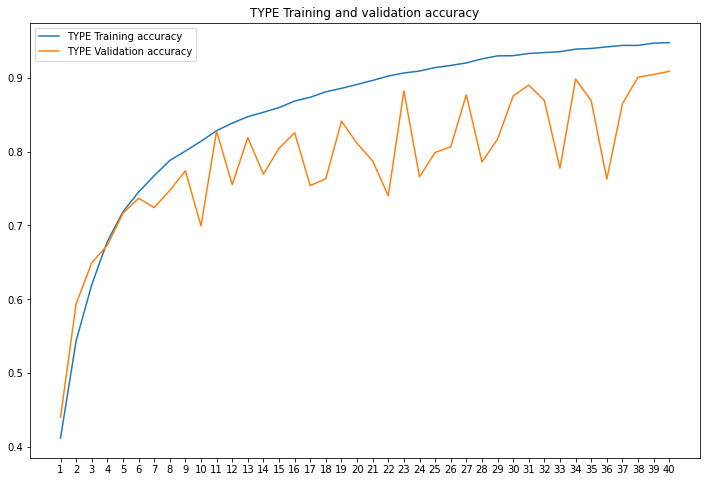

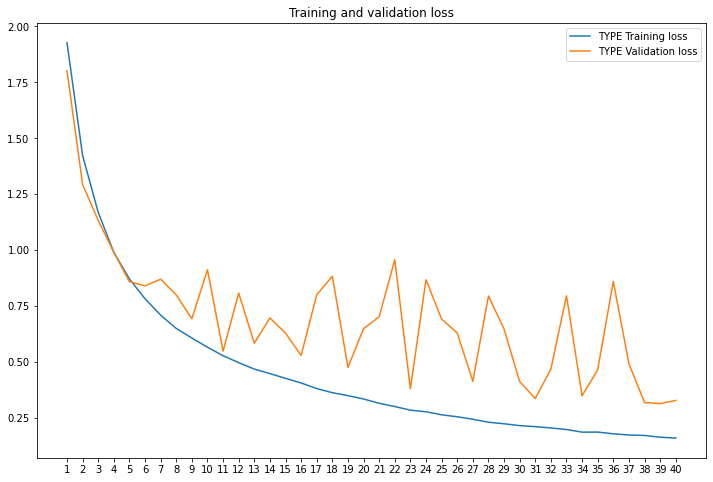

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
acc = history.history['type_output_accuracy']
val_acc = history.history['val_type_output_accuracy']
loss = history.history['type_output_loss']
val_loss = history.history['val_type_output_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, label='TYPE Training accuracy')
plt.plot(epochs, val_acc, label='TYPE Validation accuracy')
plt.xticks(ticks=epochs)
plt.title('TYPE Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='TYPE Training loss')
plt.plot(epochs, val_loss, label='TYPE Validation loss')
plt.xticks(ticks=epochs)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt

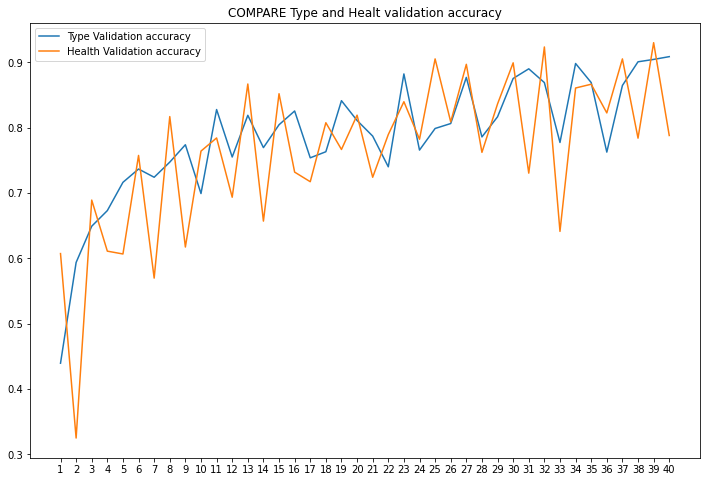

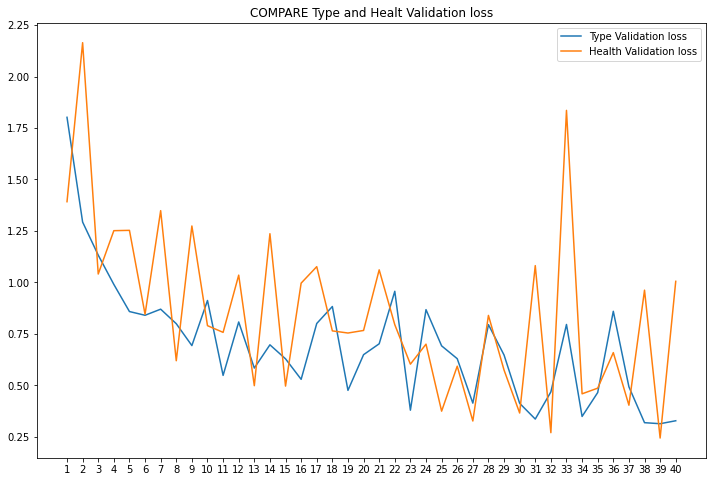

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
acc = history.history['val_type_output_accuracy']
val_acc = history.history['val_health_output_accuracy']
loss = history.history['val_type_output_loss']
val_loss = history.history['val_health_output_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, label='Type Validation accuracy')
plt.plot(epochs, val_acc, label='Health Validation accuracy')
plt.xticks(ticks=epochs)
plt.title('COMPARE Type and Healt validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='Type Validation loss')
plt.plot(epochs, val_loss, label='Health Validation loss')
plt.xticks(ticks=epochs)
plt.title('COMPARE Type and Healt Validation loss')
plt.legend()
plt.show()
plt

In [ ]:
history.history

{'health_output_accuracy': [0.3848409056663513,
  0.5011613965034485,
  0.5771598815917969,
  0.6376880407333374,
  0.683738112449646,
  0.7165505290031433,
  0.7431387305259705,
  0.7624878883361816,
  0.7795819044113159,
  0.792661726474762,
  0.8056288361549377,
  0.819272518157959,
  0.8276616334915161,
  0.8369753956794739,
  0.8463793396949768,
  0.8522878289222717,
  0.8594141006469727,
  0.8661569952964783,
  0.8733057975769043,
  0.877838671207428,
  0.8828225135803223,
  0.8870847821235657,
  0.891076385974884,
  0.8960602283477783,
  0.8989017605781555,
  0.9019010663032532,
  0.9072683453559875,
  0.9092979431152344,
  0.9104255437850952,
  0.9141014218330383,
  0.916311502456665,
  0.9196040034294128,
  0.9211600422859192,
  0.9266175031661987,
  0.9257379770278931,
  0.9283088445663452,
  0.9308346509933472,
  0.9314886331558228,
  0.9331799745559692,
  0.9345781803131104],
 'health_output_loss': [2.1119067668914795,
  1.6302884817123413,
  1.3810927867889404,
  1.1717842

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/Desafio II/weights_m1_fix.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Utilizamos el Encoder para convertir el resultado de la predicción en un label

tick_labels_h = heal_encoder.categories_[0].tolist()
print(tick_labels_h[15])
tick_labels_t = type_encoder.categories_[0].tolist()
print(tick_labels_t[12])

Powdery_mildew
Squash


In [ ]:
from IPython.display import clear_output

In [ ]:
# Generamos dos listas de predicciones para cada archivo en el set de Test
# Medimos el Accuracy de nuestro modelo

list_test_pred_health = []
list_test_pred_type= []
preds_true = 0
for index, plant in df_test.iterrows():
  img = image.load_img(plant.file, target_size=(150, 150))

  # La convertimos a un Numpy de forma (150, 150, 3)
  x = image.img_to_array(img)

  # La reescalamos a (1, 150, 150, 3)
  x = x.reshape((1,) + x.shape)

  batch = test_datagen.flow(x, batch_size=1)
  plt.figure(i)

  #imgplot = plt.imshow(image.array_to_img(batch[0][0]))
  health_pred, type_pred = model.predict(batch[0])
  health_pred_lbl = tick_labels_h[np.argmax(health_pred)]
  type_pred_lbl = tick_labels_t[np.argmax(type_pred)]
  list_test_pred_health.append(health_pred_lbl)
  list_test_pred_type.append(type_pred_lbl)
  
  # Medimos el Accuracy de nuestro modelo
  if plant.type + plant.health == type_pred_lbl + health_pred_lbl:
    preds_true += 1
  
  clear_output(wait=True)
  print('Accuracy:',np.round(preds_true / (index + 1), 3))

<Figure size 432x288 with 0 Axes>

In [ ]:
# Adjuntamos las predicciones al DataFrame de Test
df_test.loc[:,['healt_pred']] = list_test_pred_health
df_test.loc[:,['type_pred']] = list_test_pred_type

In [ ]:
# Creamos dos columnas de predicciones concatenadas para luego evaluar en que porcentaje acertó tanto en el tipo de hoja como en la salud
df_test.loc[:,['concat_real']] = df_test.apply(lambda x: x.type + '__' + x.health, axis=1)
df_test.loc[:,['concat_pred']] = df_test.apply(lambda x: x.type_pred + '__' + x.healt_pred, axis=1)

In [ ]:
df_test.to_csv('resNet_multi_output_TEST.csv')

Confusion Matrix


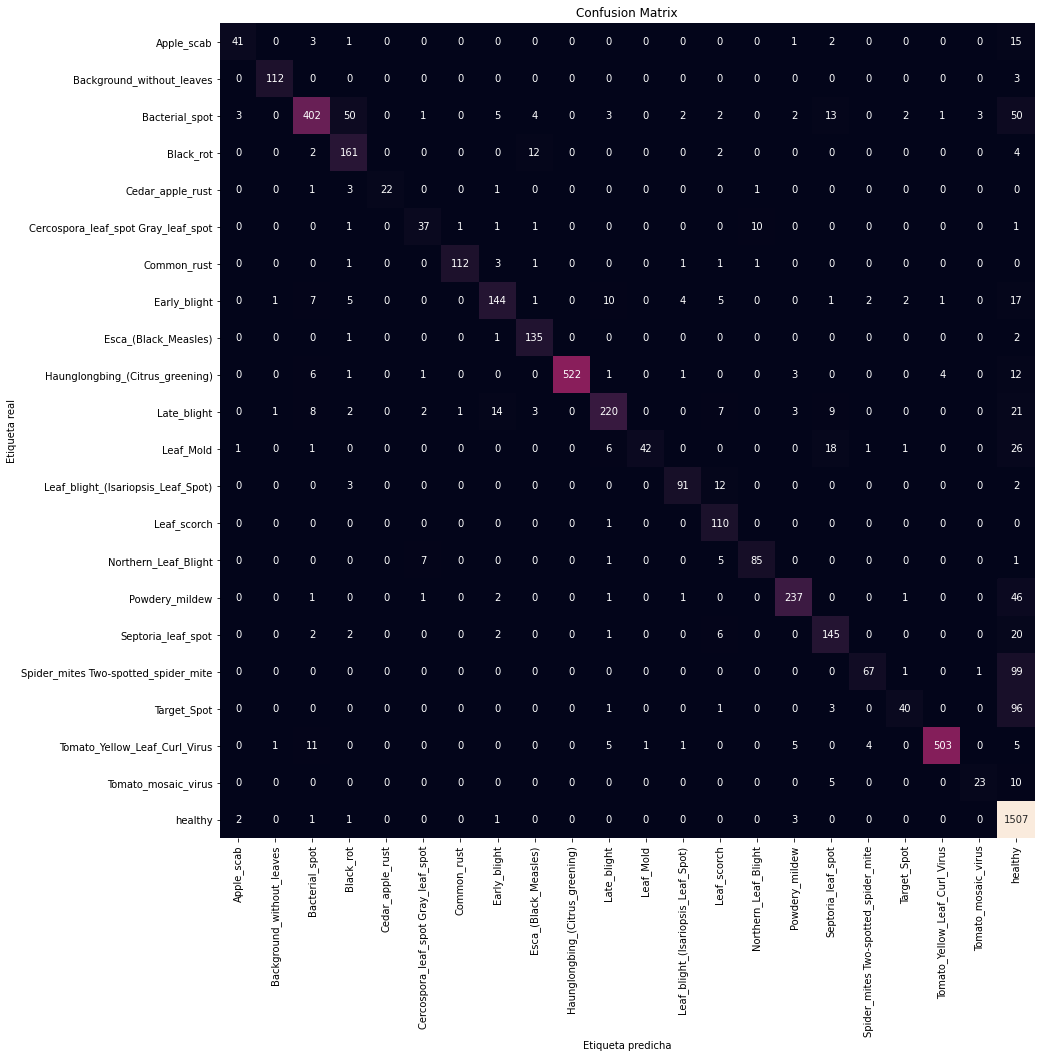

In [55]:
# Matriz de Confusión de Health
print('Confusion Matrix')
cm = confusion_matrix(df_test.health, df_test.healt_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='.0f', square=True,
             xticklabels=tick_labels_h, yticklabels=tick_labels_h,
             cbar=False)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# Classification report
print('\nClassification Report:\n')
print(classification_report(df_test.health.to_numpy().flatten(), df_test.healt_pred.to_numpy().flatten(), target_names=tick_labels_h, digits = 2))


Classification Report:

                                      precision    recall  f1-score   support

                          Apple_scab       0.87      0.65      0.75        63
           Background_without_leaves       0.97      0.97      0.97       115
                      Bacterial_spot       0.90      0.74      0.81       543
                           Black_rot       0.69      0.89      0.78       181
                    Cedar_apple_rust       1.00      0.79      0.88        28
 Cercospora_leaf_spot Gray_leaf_spot       0.76      0.71      0.73        52
                         Common_rust       0.98      0.93      0.96       120
                        Early_blight       0.83      0.72      0.77       200
                Esca_(Black_Measles)       0.86      0.97      0.91       139
     Haunglongbing_(Citrus_greening)       1.00      0.95      0.97       551
                         Late_blight       0.88      0.76      0.81       291
                           Leaf_Mold  

Confusion Matrix


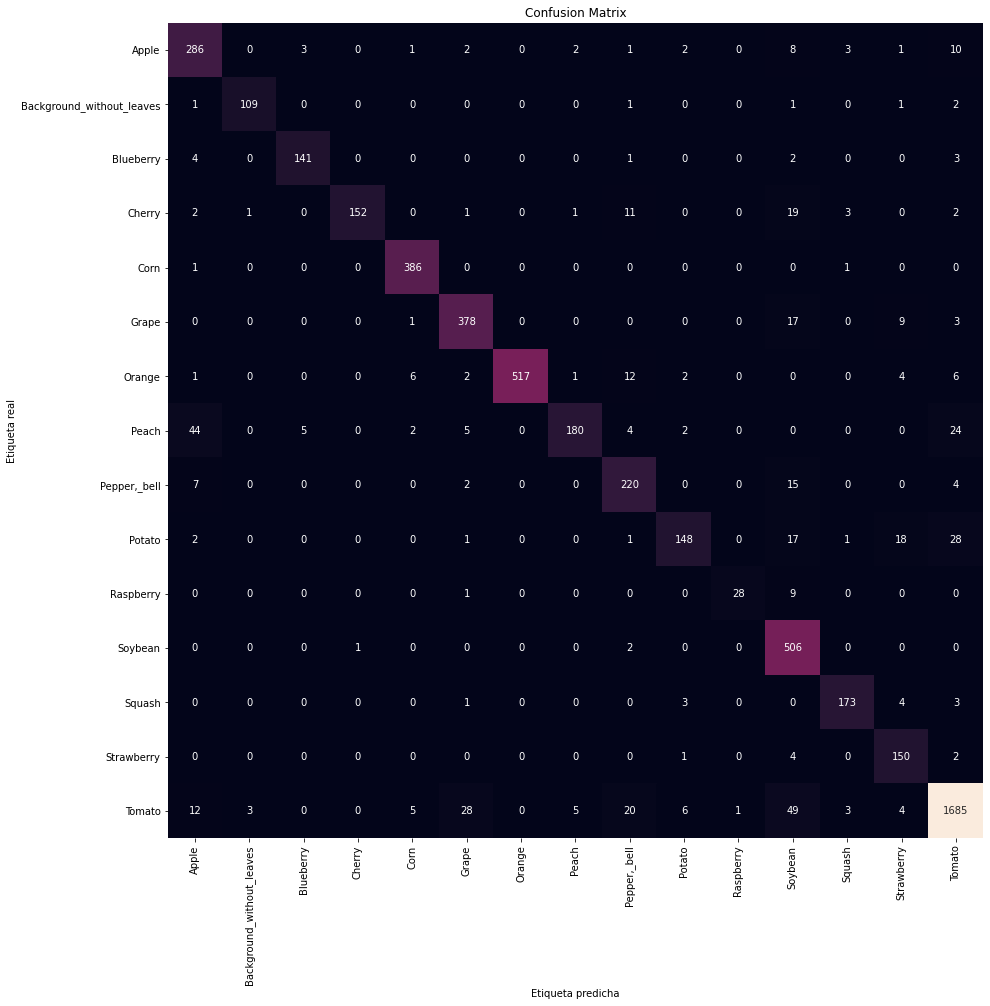

In [56]:
# Matriz de Confusión de Type
print('Confusion Matrix')
cm = confusion_matrix(df_test.type, df_test.type_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='.0f', square=True,
             xticklabels=tick_labels_t, yticklabels=tick_labels_t,
             cbar=False)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Confusion Matrix')
plt.show()

In [61]:
# Classification report
print('\nClassification Report:\n')
print(classification_report(df_test.type.to_numpy().flatten(), df_test.type_pred.to_numpy().flatten(), target_names=tick_labels_t, digits = 2))


Classification Report:

                           precision    recall  f1-score   support

                    Apple       0.79      0.90      0.84       319
Background_without_leaves       0.96      0.95      0.96       115
                Blueberry       0.95      0.93      0.94       151
                   Cherry       0.99      0.79      0.88       192
                     Corn       0.96      0.99      0.98       388
                    Grape       0.90      0.93      0.91       408
                   Orange       1.00      0.94      0.97       551
                    Peach       0.95      0.68      0.79       266
             Pepper,_bell       0.81      0.89      0.84       248
                   Potato       0.90      0.69      0.78       216
                Raspberry       0.97      0.74      0.84        38
                  Soybean       0.78      0.99      0.88       509
                   Squash       0.94      0.94      0.94       184
               Strawberry       0.79

Confusion Matrix


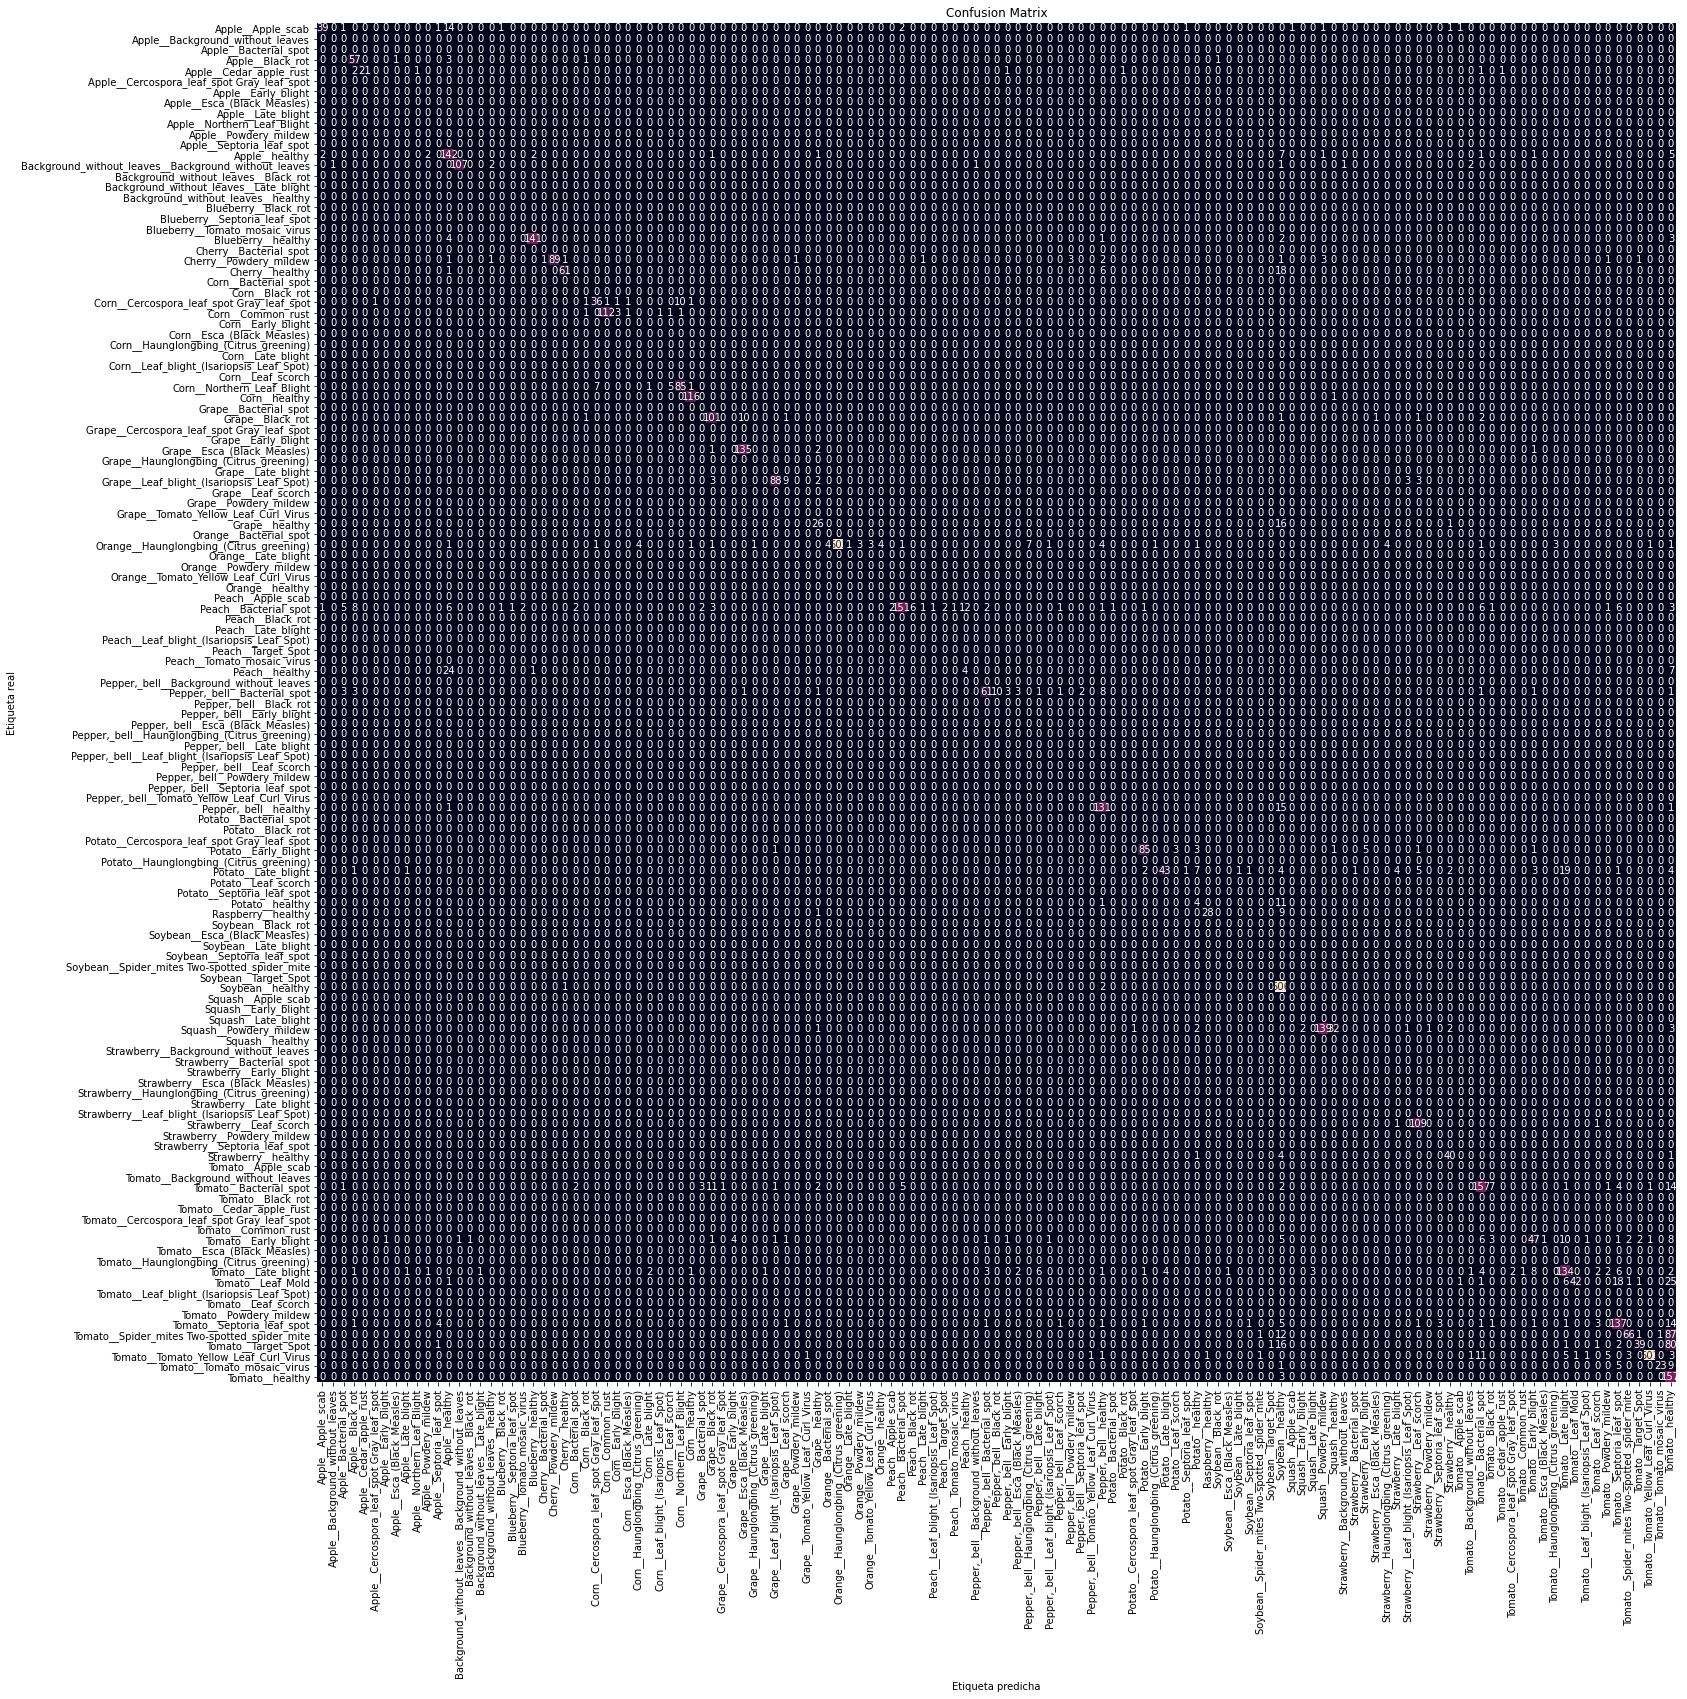

In [57]:
# Matriz de Confusión de las categorías concatenadas
print('Confusion Matrix')
cm = confusion_matrix(df_test.concat_real, df_test.concat_pred)

lbl_concat_preds = np.sort(df_test.concat_pred.unique())

plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True, fmt='.0f', square=True,
             xticklabels=lbl_concat_preds, yticklabels=lbl_concat_preds,
             cbar=False)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df_test.concat_pred.value_counts().tail(30)

In [58]:
# Classification report
print('\nClassification Report:\n')
print(classification_report(df_test.concat_real.to_numpy().flatten(), df_test.concat_pred.to_numpy().flatten(), target_names=lbl_concat_preds, digits = 2))


Classification Report:

                                                      precision    recall  f1-score   support

                                   Apple__Apple_scab       0.93      0.62      0.74        63
                    Apple__Background_without_leaves       0.00      0.00      0.00         0
                               Apple__Bacterial_spot       0.00      0.00      0.00         0
                                    Apple__Black_rot       0.78      0.90      0.84        63
                             Apple__Cedar_apple_rust       1.00      0.75      0.86        28
          Apple__Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00         0
                                 Apple__Early_blight       0.00      0.00      0.00         0
                         Apple__Esca_(Black_Measles)       0.00      0.00      0.00         0
                                  Apple__Late_blight       0.00      0.00      0.00         0
                         Apple__No

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Obtenemos las predicciones equivocadas
bad_pred_mask = df_test.concat_real !=  df_test.concat_pred
bad_pred_mask.sum()

In [59]:
df_test[bad_pred_mask]

,file,path,health,type,healt_pred,type_pred,concat_real,concat_pred
7,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,Tomato_Yellow_Leaf_Curl_Virus,Tomato,healthy,Tomato,Tomato__Tomato_Yellow_Leaf_Curl_Virus,Tomato__healthy
55,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,Tomato_Yellow_Leaf_Curl_Virus,Tomato,Powdery_mildew,Tomato,Tomato__Tomato_Yellow_Leaf_Curl_Virus,Tomato__Powdery_mildew
58,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,Tomato_Yellow_Leaf_Curl_Virus,Tomato,Late_blight,Tomato,Tomato__Tomato_Yellow_Leaf_Curl_Virus,Tomato__Late_blight
70,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,Tomato_Yellow_Leaf_Curl_Virus,Tomato,healthy,"Pepper,_bell",Tomato__Tomato_Yellow_Leaf_Curl_Virus,"Pepper,_bell__healthy"
75,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,./Plants/test/Tomato_Yellow_Leaf_Curl_Virus/To...,Tomato_Yellow_Leaf_Curl_Virus,Tomato,Powdery_mildew,Tomato,Tomato__Tomato_Yellow_Leaf_Curl_Virus,Tomato__Powdery_mildew
...,...,...,...,...,...,...,...,...
5551,./Plants/test/Apple_scab/Apple/image (416).JPG,./Plants/test/Apple_scab/Apple,Apple_scab,Apple,healthy,Apple,Apple__Apple_scab,Apple__healthy
5552,./Plants/test/Apple_scab/Apple/image (487).JPG,./Plants/test/Apple_scab/Apple,Apple_scab,Apple,Bacterial_spot,Peach,Apple__Apple_scab,Peach__Bacterial_spot
5555,./Plants/test/Apple_scab/Apple/image (288).JPG,./Plants/test/Apple_scab/Apple,Apple_scab,Apple,healthy,Apple,Apple__Apple_scab,Apple__healthy
5556,./Plants/test/Apple_scab/Apple/image (151).JPG,./Plants/test/Apple_scab/Apple,Apple_scab,Apple,healthy,Apple,Apple__Apple_scab,Apple__healthy


In [ ]:
# Iteramos y obtenemos las hoja reales vs una muestra de la prediccion
# Para visualizar los errores del modelo 
i = 0
for index, plant in df_test[bad_pred_mask].iterrows():

  img = image.load_img(plant.file, target_size=(150, 150))

  # La convertimos a un Numpy de forma (150, 150, 3)
  x = image.img_to_array(img)

  # La reescalamos a (1, 150, 150, 3)
  x = x.reshape((1,) + x.shape)

  batch = test_datagen.flow(x, batch_size=1) 

  type_mask = df_train.type == plant.type_pred 
  health_mask = df_train.health == plant.healt_pred
  example_pred = df_train[type_mask & health_mask].file

  # Si existe la combinacion entre hoja y estado de salud, imprimimos ambas imagenes
  if (example_pred.shape[0] > 0):
    print("Real: " + plant.type + "-" + plant.health + " | predicted: " + plant.type_pred + "-" + plant.healt_pred)
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0][0]))
    plt.axis('off')
    plt.show()  
    print("Example prediction:")
    y_img = image.load_img(example_pred.iloc[0], target_size=(150, 150))
    y = image.img_to_array(y_img)
    y = y.reshape((1,) + y.shape)
    print(plant.type_pred + "-" + plant.healt_pred)
    Y_batch = test_datagen.flow(y, batch_size=1)
    Y_imgplot = plt.imshow(image.array_to_img(Y_batch[0][0]))
    plt.axis('off')
    plt.show()  
    print('######','\n\n')
  i += 1
  if i % 20 == 0:
      break

In [ ]:
  type_mask = df_train.type == 'Apple'
  health_mask = df_train.health == 'healthy'
  example_pred = df_train[type_mask & health_mask].file


In [ ]:
example_pred.iloc[0]